# 2950 Project Phase 4

Flavia Jiang (yj472), Rachel Wang (jw879)

# Part 1 - Introduction
## Background Information:
In this project, we look for different attributes' influence on dating decision and the differences among gender.

Mate selection is a complex phenomenon influenced by various factors, where dating is the learning period for selecting potential marriage partners. 2023 data from Pew Research Center finds that three in 10 Americans are single, and about half (51%) are open to either a committed relationship or casual dates. Over half of men (56%) are looking for either a committed relationship or casual dates, and less than half of women (44%) say the same thing.

Given the important status of dating in current American's life, this research will focuses on analysis on a Speed Dating Experiement. The experiment involved participants engaging in speed dating sessions, where individuals had brief interactions and decided whether they wanted to date a potential match. The research highlights significant gender differences in decision-making during these speed dating sessions. For instance, the data shows that women are more likely to say "Yes" in their first meeting compared to men.
## Research Questions:
How accurately can we predict people's decision during the initial meet about whether they would like to meet their dates again based on their ratings on various attributes of their dates (attractiveness, sincerity, fun, intelligence, and ambition) Are some predictors less or more important for the female or male participants? 

## Summary of Findings:

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import duckdb
from statsmodels.api import Logit
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Part 2 - Data Description

## Data Cleaning

For details, see Appendix.ipynb. The cleaned dataframe was saved to a csv file: https://github.com/flaviafafaf/info2950_project/blob/main/final/dating_main.csv

In [38]:
main_df = pd.read_csv("dating_main.csv").iloc[: , 1:]
main_df.head()
main_df.columns

Index(['id', 'gender', 'wave', 'num_dates', 'partner_id', 'age', 'field_cd',
       'race', 'career_c', 'rate_self_attr', 'rate_self_sinc', 'rate_self_fun',
       'rate_self_intel', 'rate_self_amb', 'decision', 'rate_p_attr',
       'rate_p_sinc', 'rate_p_intel', 'rate_p_fun', 'rate_p_amb', 'field',
       'race_cd', 'career', 'gender_cd'],
      dtype='object')

## 1. What are the observations (rows) and the attributes (columns)?

Rows of main_df:

- Each row represents a dating meet between two participants (one as dater, one as datee) during experimental speed dating events.
- For example, subject 1 and subject 3 dated each other in the speed dating event. Two rows that represent this pair would be in the data set. One row has subject 1 as dater, subject 3 as datee. The other row has subject 3 as dater, subject 1 as datee. 
- Notes: a subject would date multiple subjects during the event.

Columns of main_df: 

- id: numerical, identifies the dater
- gender: categorical, gender of dater, "Female" or "Male"
- gender_cd: binary, gender coded (Male - 1, Female - 0)
- wave: numerical, identifies the speed dating event session the dater was in 
- round: numerical, number of datees a dater met in the speed dating event
- partner_id: numerical, datee’s id number
- age: numerical, age of dater (potential predictor)
- decision: whether dater would like to meet the datee again. 1=yes, 0=no (response)
- field (value) & field_cd (code) that the dater studied
    - 1 Law  
    - 2 Math
    - 3 Social Science, Psychologist 
    - 4 Medical Science, Pharmaceuticals, and Bio Tech 
    - 5 Engineering  
    - 6 English/Creative Writing/ Journalism 
    - 7 History/Religion/Philosophy 
    - 8 Business/Econ/Finance 
    - 9 Education, Academia 
    - 10 Biological Sciences/Chemistry/Physics
    - 11 Social Work 
    - 12 Undergrad/undecided 
    - 13 Political Science/International Affairs 
    - 14 Film
    - 15 Fine Arts/Arts Administration
    - 16 Languages
    - 17 Architecture
    - 18 Other
- race (value) & race_cd (code): categorical, race of dater
    - Black/African American
    - European/Caucasian-American
    - Latino/Hispanic American
    - Asian/Pacific Islander/Asian-American
    - Native American
    - Other
- career (value) & career_c (code): categorical, career of dater
    - Lawyer 
    - Academic/Research 
    - Psychologist 
    - Doctor/Medicine 
    - Engineer 
    - Creative Arts/Entertainment 
    - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    - Real Estate 
    - International/Humanitarian Affairs 
    - Undecided 
    - Social Work
    - Speech Pathology
    - Politics
    - Pro sports/Athletics
    - Other
    - Journalism
    - Architecture
     
- Dater's ratings on themselves for the following five attributes on a scale of 1-10: (1=awful, 10=great) (potential predictors)
    - rate_self_attr: Attractive
    - rate_self_sinc: Sincere
    - rate_self_intel: Intelligent
    - rate_self_fun: Fun
    - rate_self_amb: Ambitious
     
- Dater's ratings on partners for the following five attributes on a scale of 1-10:  (1=awful, 10=great)(potential predictors)
    - rate_p_attr: Attractive
    - rate_p_sinc: Sincere
    - rate_p_intel: Intelligent
    - rate_p_fun: Fun
    - rate_p_amb: Ambitious
    
## 2. Why was this dataset created?

This dataset was created to investigate and analyze various aspects of human dating behaviors in the context of speed dating. Researchers were interested in understanding how individuals make dating decisions, what attributes they consider important, and how different factors predict their decisions about whether to continue the relationship. The researchers were particularly interested in the gender differences in dating behaviors and decision making strategies.

## 3. Who funded the creation of the dataset?

The dataset was collected as part of academic research. 

## 4. What processes might have influenced what data was observed and recorded and what was not?

Participant Demographics: The age, gender, and demographic characteristics of the participants could influence the data collected. In this study, all subjects are from graduate and professional school of Columbia University which might cause bias for what the researcher observed.

Self-Selection of Participants: Participants in the speed dating experiment were volunteers, which means they self-selected to take part. This self-selection process may have introduced biases, as those who chose to participate might have different preferences or characteristics compared to the general population. This could impact the generalizability of the findings.

Experiment Design: The design of the speed dating experiment determined what data could be collected. The researchers structured the experiment, including the number of participants, the number of potential partners, and the available information about each partner. The experimental conditions may not fully represent real-world dating situations.

Survey Responses: The data collected was based on surveys and questionnaires filled out by participants. Data collection relied on participants' willingness to respond honestly and accurately, which could be influenced by social desirability bias or other factors. 

## 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We selected columns necessary for our study. We then renamed some of the columns to more meaningful names, changed the datatypes of some columns to the most appropriate types, and removed missing data. 


## 6. If people are involved, were they aware of the data collection, and if so, what purpose did they expect the data to be used for?

Participants in the speed dating events would have been aware of the data collection process, as informed consent is a standard practice in research involving human subjects. They would have been informed about the purpose of the data collection, which is typically for academic research. Participants would have expected the data to be used to study dating behavior and potentially contribute to our understanding of human interactions and preferences.

## 7. Where can your raw source data be found, if applicable? Provide a link to the raw data

Raw data can be found in our repo: https://github.com/flaviafafaf/info2950_project/blob/main/data/speed_dating_data.csv

Codebook can also be found in our repo: 
https://github.com/flaviafafaf/info2950_project/blob/main/data/variable_codebook.doc

Link to the source data and codebook: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

Link to the paper written by the researchers: 
http://www.stat.columbia.edu/~gelman/stuff_for_blog/sheena.pdf

## Part 3 - Preregistration statements

**Hypothesis 1**
Generally, daters consider various attributes in the datee (attractiveness, sincerity, fun, intelligence, ambition) when deciding whether they would like to meet the datee again.

Null: 
For each of the variables in βrate_p_attr

βrate_p_attr = 0, βrate_p_sinc = 0, βrate_p_fun = 0, βrate_p_intel = 0, βrate_p_amb = 0, βgender*rate_p_attr = 0, βgender*rate_p_sinc = 0, βgender*rate_p_fun = 0, βgender*rate_p_intel = 0, βgender*rate_p_amb = 0


Alternative:
-  βrate_p_attr ≠ 0, βrate_p_sinc ≠ 0, βrate_p_fun ≠ 0, βrate_p_intel ≠ 0, βrate_p_amb ≠ 0, βgender*rate_p_attr ≠ 0, βgender*rate_p_sinc ≠ 0, βgender*rate_p_fun ≠ 0, βgender*rate_p_intel ≠ 0, βgender*rate_p_amb ≠ 0

**Hypothesis 2**
Women might care more or less about the above attributes than men.

## Part 4- Data Analysis - Descriptive Analysis

■ Use summary functions like mean and standard deviation along with
visual displays like scatterplots and histograms to describe data.
■ Provide at least one model showing patterns or relationships between
variables that addresses your research question. This could be a
regression or clustering, or something else that measures some property
of the dataset.

We cared about how the sample was made up of in term of demographics because we wanted to be aware of sampling bias, which was part of data limitations that might hinder us from generalizing our model to certain different samples. Knowing the subjects well also allowed us to add creativity to our models based on the sample's general characterisitics. 

In this part we will examine both dating_df and similarity_df, though we primarily focused on dating_df.

### Analysis by subject

We should always keep in mind that each row of dating_df/similarity_df represents a dating meet, not a subject. This matters because each subject was involved in various number of dates. When we analyze the demographics, we care about the sample of subjects, so we should first create a new data frame.

In [18]:
# Select columns that are always the same for each subject. 
dating_df_subject = dating_df[['id', 'gender', 'wave', 'num_dates', 'age', 'race', 
                   'sports', 'tvsports', 'exercise','dining', 'museums', 
                   'art', 'hiking', 'gaming', 'clubbing', 'reading',
                   'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 
                   'yoga','rate_self_attr', 'rate_self_sinc', 'rate_self_fun', 
                   'rate_self_intel','rate_self_amb', 'field', 'career']]
dating_df_subject = dating_df_subject.drop_duplicates()
print(dating_df_subject.shape)
dating_df_subject.head()

(397, 30)


,id,gender,wave,num_dates,age,race,sports,tvsports,exercise,dining,...,music,shopping,yoga,rate_self_attr,rate_self_sinc,rate_self_fun,rate_self_intel,rate_self_amb,field,career
30,4,Female,1,10,23,European/Caucasian-American,1,1,6,7,...,7,1,8,7,8,9,7,8,Law,Lawyer
40,5,Female,1,10,21,European/Caucasian-American,7,4,7,7,...,7,8,3,6,3,6,10,8,Law,Lawyer
50,6,Female,1,10,23,Asian/Pacific Islander/Asian-American,10,8,9,7,...,4,1,1,5,7,8,9,5,Law,Lawyer
60,7,Female,1,10,22,Asian/Pacific Islander/Asian-American,5,3,4,10,...,10,10,10,6,6,5,7,7,Law,Lawyer
70,8,Female,1,10,25,European/Caucasian-American,2,2,1,10,...,6,8,6,7,4,8,8,8,Political Science/International Affairs,Creative Arts/Entertainment


#### Gender of participants

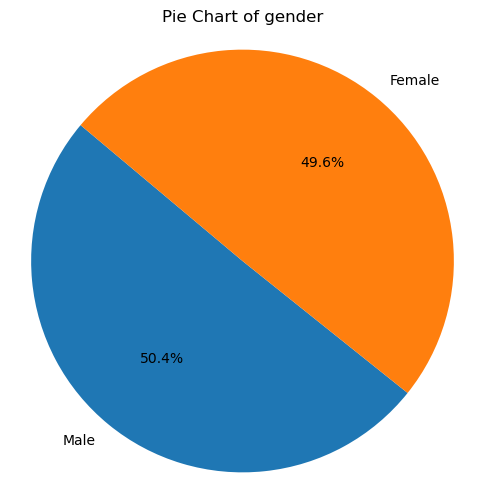

In [19]:
def draw_pie(categorical_var):
    plt.figure(figsize=(6, 6))
    value_counts = dating_df_subject[categorical_var].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(f'Pie Chart of {categorical_var}')
    plt.show()

draw_pie("gender")


We were happy to obserse that after removing all the missing values, the number of female and male participants could still reach a balance. Neither group was underrepresented, so we should be relatively confident in our future analysis in terms of gender differences. 

#### Age distribution of participants

In [20]:
print(dating_df_subject[["age"]].describe())

              age
count  397.000000
mean    26.158690
std      3.555122
min     18.000000
25%     23.000000
50%     26.000000
75%     28.000000
max     42.000000


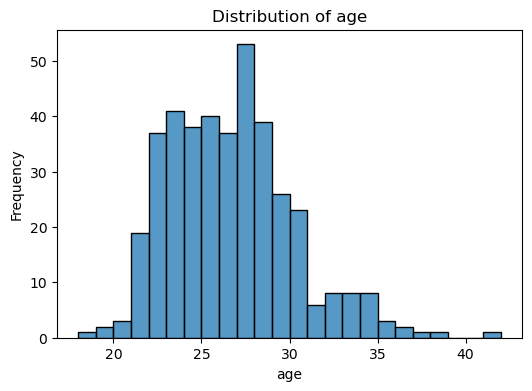

In [21]:
def draw_hist(numerical_var, bin_width):
    plt.figure(figsize = (6, 4))
    sns.histplot(data = dating_df_subject, x = numerical_var, binwidth = bin_width)
    plt.title(f'Distribution of {numerical_var}')
    plt.xlabel(numerical_var)
    plt.ylabel('Frequency')
    plt.show()

draw_hist("age", 1)

The mean age of participants was 26.2. The minimum age was 18, and the maximum age was 42. And from the histogram we could tell there were less observations for subjects aged below 20 or above 35. This implis our regression model might not be generalizable to these populations.

#### Fields the subjects studied

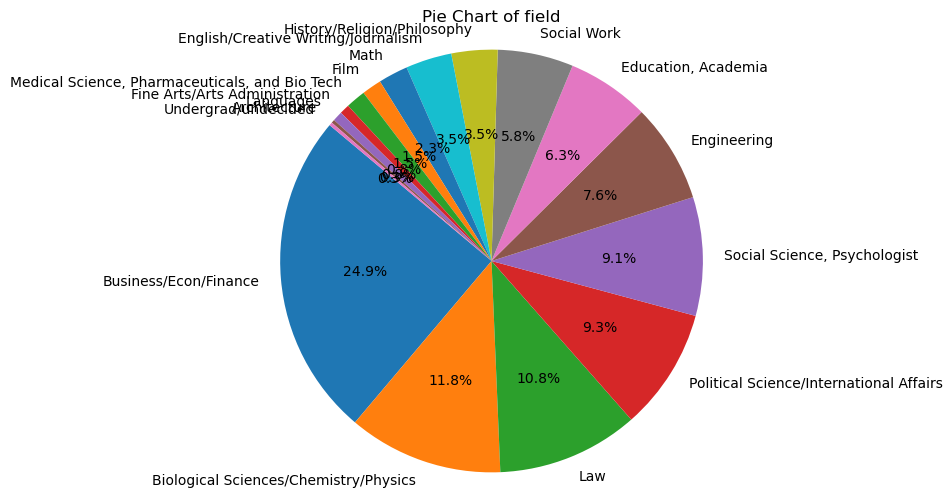

In [22]:
draw_pie("field")

The problem of the data regarding participants' fields here was quite obvious. About 1/4 of the students were in Business/Econ/Finance-related fields. However, majors like Fine Arts/Arts Administration were underrepresented. Although we could use field as a predictor, this would not solve the problem with the data itself. Because we could not be confident in whether participants majoring in Fine Arts/Arts Administration could represent the whole population of students majoring in Fine Arts/Arts Administration – we just did not have enough data.

#### Distribution of race

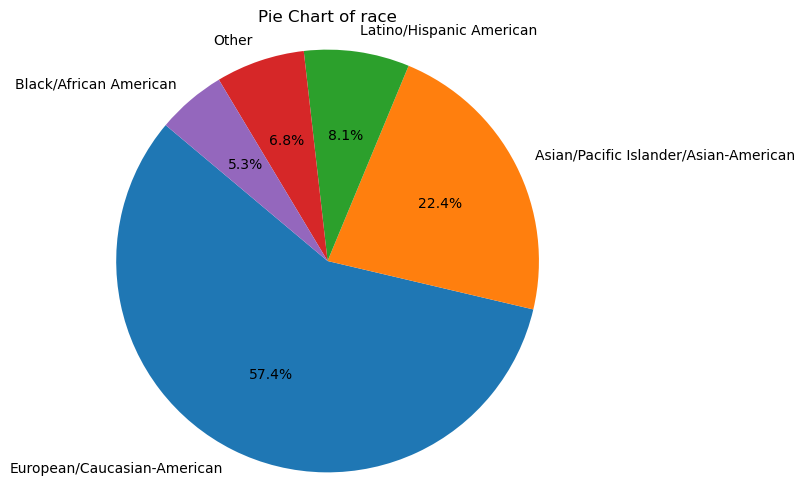

In [23]:
draw_pie("race")

Same problem here. Black/African American, Latino/Hispanic American, and international students were underrepresented compared to European/Caucasian-American and Asian/Pacific Islander/Asian American participants. This does not necessarily imply the data set is bad. Instead, doing this kind of descriptive statistics enables us to acknowledge the potential lack of generalizability of the models we make for the next phase to certain populations.

#### Self-ratings on the five attributes

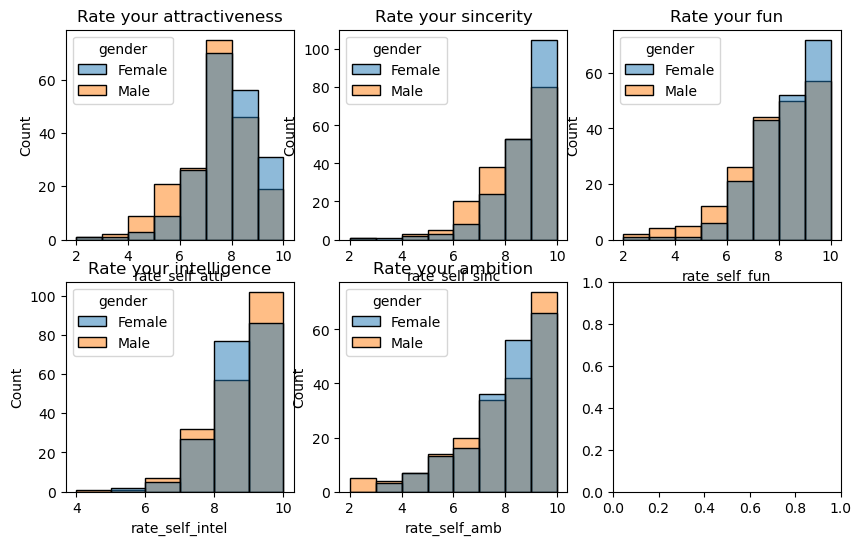

In [24]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6))
def draw_hist(numerical_var, bin_width, ax):
    sns.histplot(data = dating_df_subject, x = numerical_var, binwidth = bin_width, hue = "gender", ax = ax)

axs[0][0].set_title("Rate your attractiveness")
axs[0][1].set_title("Rate your sincerity")
axs[0][2].set_title("Rate your fun")
axs[1][0].set_title("Rate your intelligence")
axs[1][1].set_title("Rate your ambition")

draw_hist("rate_self_attr", 1, axs[0,0])
draw_hist("rate_self_sinc", 1, axs[0,1])
draw_hist("rate_self_fun", 1, axs[0,2])
draw_hist("rate_self_intel", 1, axs[1,0])
draw_hist("rate_self_amb", 1, axs[1,1])

It seemed that participants were generally less confident in their attractiveness than the other fours attributes. And they were the most confident in their intelligence, because they were mostly graduates students at Columbia University. In term of gender difference, female participants were generally more confident in their attractiveness, sincerity, and fun character, and less confident in their intelligence and ambition than male participants.

### Analysis by dating meet

Now let's explore how female and male participants made decisions on dates similarly or differently.

In [25]:
dating_df.groupby("gender")["decision"].mean()

gender
Female    0.361749
Male      0.503386
Name: decision, dtype: float64

On average, female participants were more selective than male participants. That is, 36.2% of the times female participants expressed they would like to meet the male datee again while male participants said yes 50.3% of the times. Such finding made us more confident in the potential of our research questions about gender differences in speed dating selectivity.

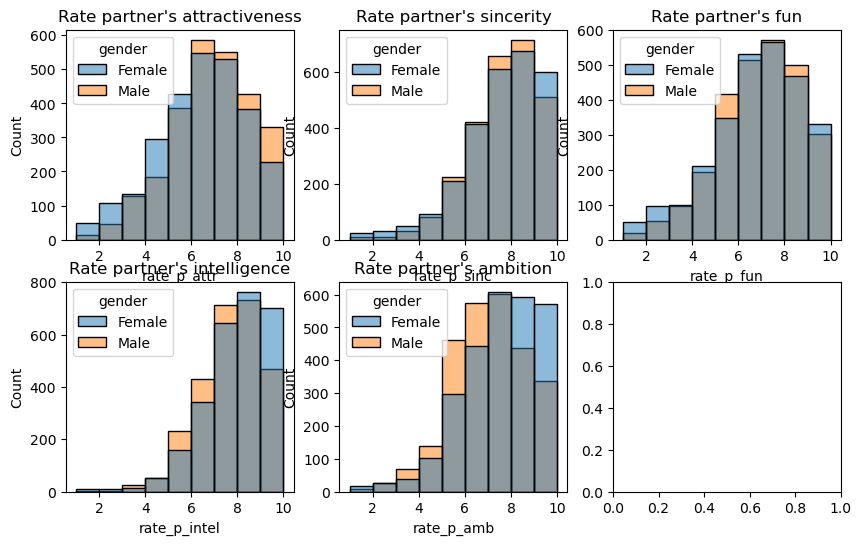

In [26]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6))
def draw_hist(numerical_var, bin_width, ax):
    sns.histplot(data = dating_df, x = numerical_var, binwidth = bin_width, hue = "gender", ax = ax)

axs[0][0].set_title("Rate partner's attractiveness")
axs[0][1].set_title("Rate partner's sincerity")
axs[0][2].set_title("Rate partner's fun")
axs[1][0].set_title("Rate partner's intelligence")
axs[1][1].set_title("Rate partner's ambition")

draw_hist("rate_p_attr", 1, axs[0,0])
draw_hist("rate_p_sinc", 1, axs[0,1])
draw_hist("rate_p_fun", 1, axs[0,2])
draw_hist("rate_p_intel", 1, axs[1,0])
draw_hist("rate_p_amb", 1, axs[1,1])

It is interesting that on average, male participants rated their female datees' attractiveness much higher than female participants rated male datees. Female participants rated their datees' intelligence and amibition much higher than male participants rated female datees. As we looked back to the histograms for self-ratings and compare those to these ratings for the opposite sex, we found that when paritipants were more confident in themselves in terms of certain attributes, they were more likely to rate the opposite sex lower in terms of these attributes. We thought the gender stereotypes were in place, the so-called social expectations on certain characteristics that males and females should have compared to the opposite sex, which could significantly affect the relative importance of different attributes in partner selection differently for females and males.

So let's try to explore how daters' ratings for datees for the five attributes were associated with the daters' decisions.

In [27]:
female = dating_df[dating_df["gender"] == "Female"]
male = dating_df[dating_df["gender"] == "Male"]
for attr in ["attr", "sinc", "fun", "intel", "amb"]:
    var = "rate_p_" + attr
    print([attr, round(np.corrcoef(dating_df[var], dating_df["decision"])[0,1],2),
           round(np.corrcoef(female[var], female["decision"])[0,1],2), 
           round(np.corrcoef(male[var], male["decision"])[0,1],2)])

['attr', 0.5, 0.45, 0.53]
['sinc', 0.21, 0.24, 0.19]
['fun', 0.41, 0.4, 0.42]
['intel', 0.21, 0.24, 0.22]
['amb', 0.17, 0.19, 0.21]


It seems that "attractive" and "fun" are more correlated with participants' decisions than other three attributes. The gender differences were not very obvious, but here we were just using pairwise correlation coefficients (which assumed linearity). And we would further examine the gender differences with multivariate logistic regression in the next phase.

There is one variable in dating_df that we had not mentioned - prob. "Prob" corresponds to the survey question, "How probable do you think it is that this person (the datee) will say 'yes' for you? (1=not probable, 10=extremely probable)" during the speed dating events. We thought prob might be a good predictor of dater's decision because of the intuition that if the dater think the datee would very likely say 'yes' for them, they would more probably shoot their shots bravely. And we also thought the importance of the datee's decision on the dater's decision could be different by gender. 

In [28]:
print(round(np.corrcoef(dating_df["prob"], dating_df["decision"])[0,1], 2))
print(round(np.corrcoef(female["prob"], female["decision"])[0,1], 2))
print(round(np.corrcoef(male["prob"], male["decision"])[0,1], 2))

0.31
0.29
0.34


In [29]:
dating_df_temp = dating_df.copy()
dating_df_temp["gender"] = dating_df_temp["gender"].map({"Female":0, "Male":1})
data_corr = dating_df_temp[['same_race',
                       'rate_p_attr',
                       'rate_p_sinc',
                       'rate_p_intel',
                       'rate_p_fun',
                       'rate_p_amb',
                       'prob']]

data_corr.corr()

,same_race,rate_p_attr,rate_p_sinc,rate_p_intel,rate_p_fun,rate_p_amb,prob
same_race,1.000000,0.050319,-0.017888,-0.000358,-0.003243,-0.000444,0.076796
rate_p_attr,0.050319,1.000000,0.391078,0.368784,0.577222,0.328938,0.268049
rate_p_sinc,-0.017888,0.391078,1.000000,0.648319,0.496675,0.450549,0.333187
rate_p_intel,-0.000358,0.368784,0.648319,1.000000,0.487820,0.624319,0.275530
rate_p_fun,-0.003243,0.577222,0.496675,0.487820,1.000000,0.486971,0.383159
rate_p_amb,-0.000444,0.328938,0.450549,0.624319,0.486971,1.000000,0.280985
prob,0.076796,0.268049,0.333187,0.275530,0.383159,0.280985,1.000000


For major predictors in dating_df, we did not find collinear predictors with the absolute value of correlation coefficient > 0.7, which means we could interpret the coefficients of the models with confidence.

In [30]:
female = similarity_df[similarity_df["gender"] == "Female"]
male = similarity_df[similarity_df["gender"] == "Male"]
for attr in ["attr", "sinc", "fun", "intel", "amb"]:
    var = attr + "_diff"
    print([var, round(np.corrcoef(similarity_df[var], similarity_df["decision"])[0,1],2),
           round(np.corrcoef(female[var], female["decision"])[0,1],2), 
           round(np.corrcoef(male[var], male["decision"])[0,1],2)])

['attr_diff', 0.41, 0.38, 0.4]
['sinc_diff', 0.21, 0.19, 0.2]
['fun_diff', 0.34, 0.33, 0.29]
['intel_diff', 0.18, 0.2, 0.19]
['amb_diff', 0.12, 0.14, 0.11]


Our predictors for similarities in character show great potentials, too.

## Part 5 - Evaluation of Significance

## Part 6 - Interpretation and Conclusions

## Part 7 - Data Limitations


1. The dataset is relatively old as the speed dating experiment was conducted from 2002 to 2004. However, we really appreciate this data because the experimental design allows us to directly observe individual decisions rather than just final matches. We tried looking for new data, but most of them came from dating apps, where many variants that might affect dating decisions were less observable and hard to measure. Using this speed dating dataset allows us to predict people's dating outcomes with far more variants. But we do acknowledge people's dating behaviors have changed over time, and our model might be less generalizable to the newest generations.

2. As previously mentioned, all participants in this study were drawn from the graduate and professional schools of Columbia University. The mean age of participants was 26.2, with an age range from 18 to 42. Consequently, our regression model may have limited generalizability to populations beyond this age range.

3. In the experimental setup, researchers assumed that all participants were interested in dating individuals of the opposite sex and paired them accordingly. However, it's important to acknowledge the possibility that some participants may identify with the LGBTQ+ group. This assumption about pairing may not accurately represent the diversity of dating preferences, and it could render some data invalid.

## Questions for reviewers

- peer reviewer
- project mentor



Thanks in advance! :)